In [1]:
import pandas as pd
import glob
import re
import xml.etree.ElementTree as et  
import os



In [27]:
class Data:
    def __init__(self, path):
        self.__data_matrix = None
        listPand = []
        self.__nData = 0
        self.__pData = 0
        for fname in glob.glob(path + "/*.txt"):
            self.__pData += 1
            df = pd.read_table(fname)  # put the file in a dataframe
            sample_name = re.search("GSM\d+", fname).group()  # search the name of the sample in the file name
            df.rename(index=df["gene/TE"],
                      inplace=True)  # rename the index (=rows) using the column containing the gene name
            df.drop(columns=df.columns[0], axis=1,
                    inplace=True)  # drop the first column containing the gene name, no more need
            df.rename(columns={df.columns[0]: sample_name},
                      inplace=True)  # rename the column (there is only one column at this step) using the sample name
            listPand.append(df)  # add the current dataframe in the list
        self.__data_matrix = pd.concat(listPand, axis=1)  # concat all dataframe in 1 dataframe
        nData = self.__data_matrix.shape
        self.__data_matrix = self.__data_matrix.transpose()  # transpose the dataframe to get a more standard shape (samples x variables)

        self.__annotation = pd.DataFrame(columns=['Sample_id', 'Cns_subregion'])  # initialisation of the dataframe
        xtree = et.parse('C:/Users/alexa/OneDrive/Bureau/fac/s6/bioinfo/projet/Bioinfo_Project_2024-main/Bioinfo_Project_2024-main/Data/GSE124439_family.xml')  # create a variable containing the xml in a tree shape
        xroot = xtree.getroot()  # get the root of the tree to start the exploration of the tree/xml
        # for each element named "sample" that can be found from the root
        for child in xroot.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Sample"):
            temp_sample_id = child.attrib['iid']  # the attribut of this node contains the sample id ()
            # for each element named "Characteristics" that can be found from the current sample
            for child2 in child.iter("{http://www.ncbi.nlm.nih.gov/geo/info/MINiML}Characteristics"):
                if child2.attrib["tag"] == "cns subregion":
                    temp_cns_subregion = child2.text.replace('\n', '')
                elif child2.attrib["tag"] == "sample group":
                    if child2.text.replace('\n', '') == "ALS Spectrum MND":
                        temp_sample_group = True
                    else:
                        temp_sample_group = False
                elif child2.attrib["tag"] == "subject id":
                    temp_subject_id = child2.text.replace('\n', '')
            temp_df = pd.DataFrame({'Sample_id': [temp_sample_id], 'Cns_subregion': [temp_cns_subregion], "Subject id": [temp_subject_id], "Disease ALS":[temp_sample_group]})
            self.__annotation = pd.concat([self.__annotation, temp_df])

    def get_data_matrix(self):
        return self.__data_matrix

    def get_annotation(self):
        return self.__annotation

    def __str__(self):
        return self.__data_matrix.to_string()

    def sample_mean(self):
        sample_mean = self.__data_matrix.mean(axis=1)
        sample_mean.hist(bins=100)
    def sample_median(self):
        sample_median = self.__data_matrix.median(axis=1)
        sample_median.hist(bins=100)
    def sample_std(self):
        sample_std = self.__data_matrix.std(axis=1)
        sample_std.hist(bins=100)

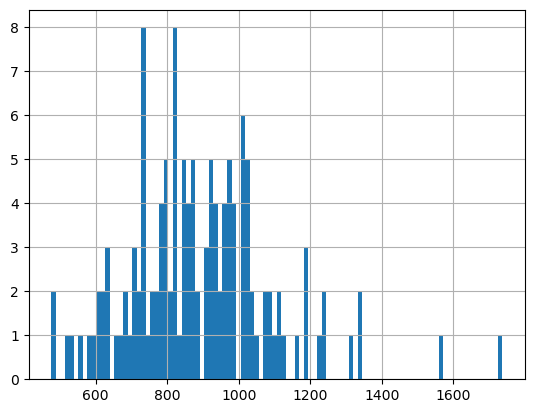

In [28]:

x = Data("C:/Users/alexa/OneDrive/Bureau/fac/s6/bioinfo/projet/Bioinfo_Project_2024-main/Bioinfo_Project_2024-main/Data")

x.sample_mean()


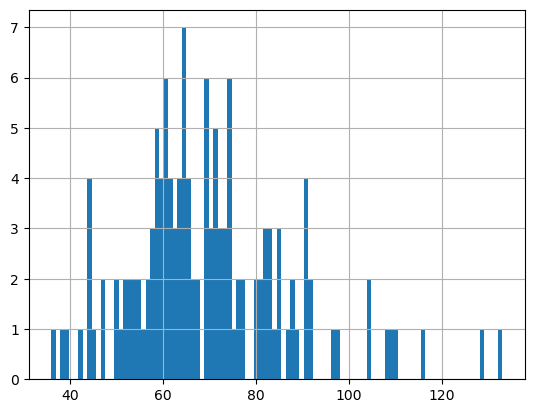

In [15]:
x.sample_median()

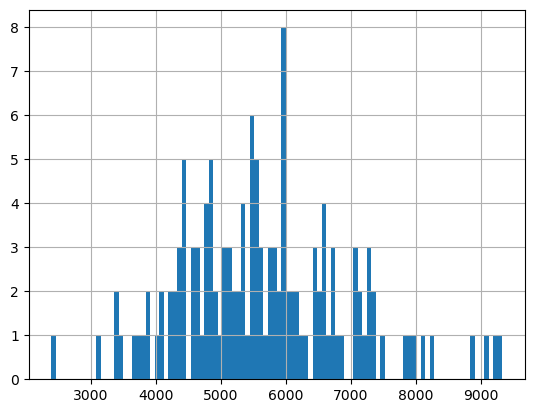

In [16]:
x.sample_std()